In [4]:

# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced plotting capabilities
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn for clustering
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for data scaling

In [5]:
import pandas as pd 
df = pd.read_csv(r"Downloads/Credit_card_dataset.csv")
df

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [12]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [14]:
df.shape

(8950, 6)

In [16]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [18]:
df= df.dropna()

In [20]:
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8949 non-null   object 
 1   BALANCE_FREQUENCY  8949 non-null   float64
 2   PURCHASES          8949 non-null   float64
 3   PAYMENTS           8949 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8949 non-null   float64
dtypes: float64(5), object(1)
memory usage: 489.4+ KB


In [24]:
#Extract relevant features for clustering
X = df[['PURCHASES', 'CREDIT_LIMIT',]]

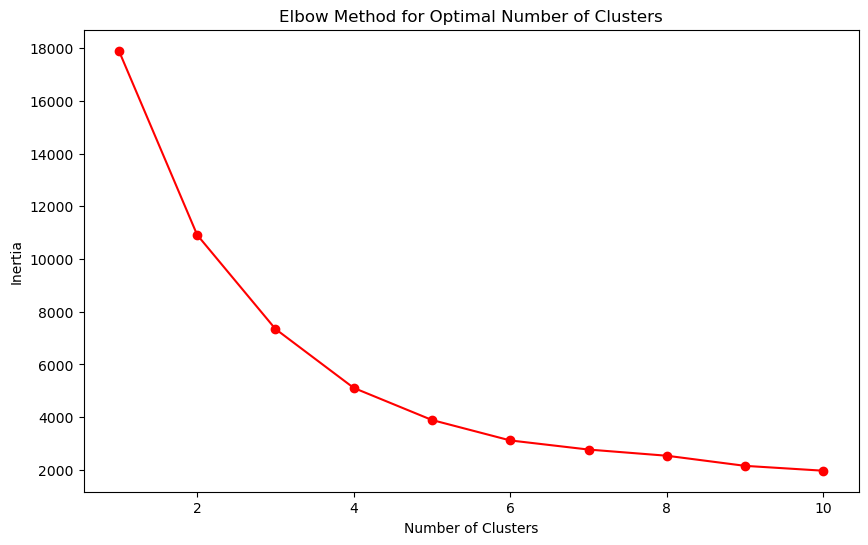

In [28]:
inertia = []  # List to store the inertia values for each number of clusters

for i in range(1, 11):  # Loop over cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)  # Initialize KMeans with the current number of clusters (i)
    kmeans.fit(X_scaled)  # Fit the KMeans model on the standardized data
    inertia.append(kmeans.inertia_)  # Append the inertia (sum of squared distances) to the list

# Plot the Elbow curve
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(range(1, 11), inertia, 'ro-')  # Plot the number of clusters against inertia with red markers and lines
# 'r': Specifies the color of the plot, in this case, red (r stands for red).
# 'o': Specifies the marker style, which in this case is a circle (o).
# '-': Specifies the line style, which in this case is a solid line (-).

plt.title('Elbow Method for Optimal Number of Clusters')  # Add a title to the plot
plt.xlabel('Number of Clusters')  # Label the x-axis as 'Number of Clusters'
plt.ylabel('Inertia')  # Label the y-axis as 'Inertia' (within-cluster sum of squares)
plt.show()  # Display the plot

In [26]:
scaler = StandardScaler()  # Initialize the StandardScaler to standardize the features by removing the mean and scaling to unit variance
X_scaled = scaler.fit_transform(X)  # Fit the scaler to the data and then transform the features, returning the standardized version of the dataset 'X'

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume 'X' is your feature matrix (e.g., 'PURCHASES' and 'CREDIT_LIMIT')

# Run K-Means with K = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(X_scaled)
wcss_4 = kmeans_4.inertia_

# Run K-Means with K = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X_scaled)
wcss_5 = kmeans_5.inertia_

# Run K-Means with K = 6
kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(X_scaled)
wcss_6 = kmeans_6.inertia_

In [34]:
print(wcss_4)

5110.120245885508


In [36]:
kmeans_4.inertia_

5110.120245885508

In [38]:
print(wcss_5)

3892.4934969645974


In [40]:
print(wcss_6)

3117.7706114042085


In [42]:
kmeans_7= KMeans(n_clusters=7, random_state=42)
kmeans_7.fit(X_scaled)
wcss_7= kmeans_7.inertia_
print(wcss_7)

2772.0215145683082


In [44]:

# Fit K-Means with 5 clusters
kmeans = KMeans(n_clusters=6, random_state=42)  # Initialize the KMeans algorithm with 5 clusters and a fixed random state for reproducibility
kmeans.fit(X_scaled)  # Fit the KMeans model to the standardized data

KMeans(n_clusters=6, random_state=42)

/var/folders/dq/2jr5fpp55ys959n_kqdn69bh0000gp/T/ipykernel_1161/3227128594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_  # Assign the cluster labels from the KMeans model to a new column 'Cluster' in the dataset


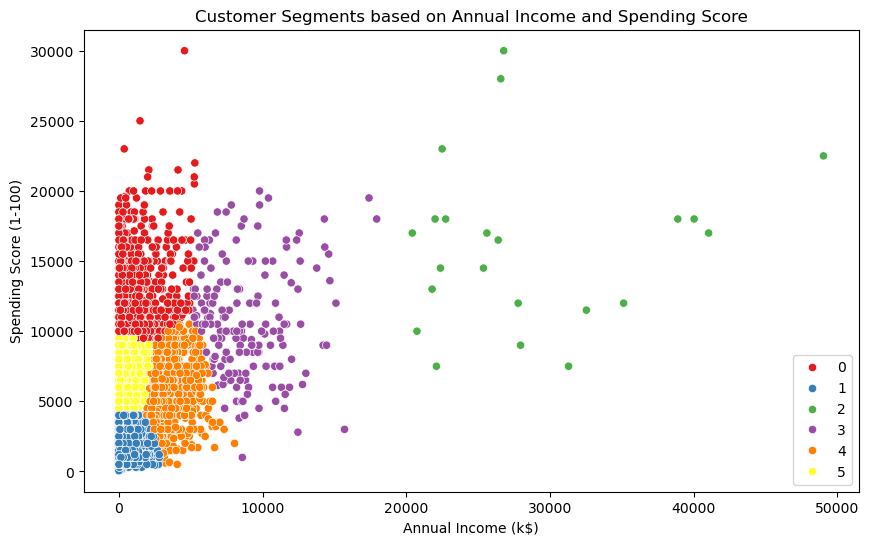

In [46]:
df['Cluster'] = kmeans.labels_  # Assign the cluster labels from the KMeans model to a new column 'Cluster' in the dataset

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette='Set1')  
# Create a scatter plot with 'Annual Income' on the x-axis, 'Spending Score' on the y-axis, and color the points by their cluster labels
plt.title('Customer Segments based on Annual Income and Spending Score')  # Add a title to the plot
plt.xlabel('Annual Income (k$)')  # Label the x-axis
plt.ylabel('Spending Score (1-100)')  # Label the y-axis
plt.legend()  # Display the legend showing the clusters
plt.show()  # Show the plot

## Cluster 0 (Blue): This cluster appears to have the lowest 'PURCHASES' values and moderate 'CREDIT_LIMIT' values. These customers may be characterized as "Low-Spenders" or "Conservative Buyers". They tend to make fewer purchases and have relatively lower credit limits. Cluster 1 (Orange): This cluster has moderate 'PURCHASES' values and higher 'CREDIT_LIMIT' values. These customers may be characterized as "Mid-Spenders" or "Average Buyers". They tend to make moderate purchases and have relatively higher credit limits. Cluster 2 (Green): This cluster has the highest 'PURCHASES' values and highest 'CREDIT_LIMIT' values. These customers may be characterized as "High-Spenders" or "Big Buyers". They tend to make frequent purchases and have relatively high credit limits. Cluster 3 (Red): This cluster has moderate 'PURCHASES' values and lower 'CREDIT_LIMIT' values. These customers may be characterized as "Budget-Conscious Buyers". They tend to make moderate purchases and have relatively lower credit limits. Cluster 4 (Purple): This cluster has the lowest 'PURCHASES' values and lowest 'CREDIT_LIMIT' values. These customers may be characterized as "Frugal Buyers". They tend to make few purchases and have relatively low credit limits.